1.Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.

2.Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .

3.Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.

Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.
5.Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреденение по десяткам точек)

6.Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

In [3]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


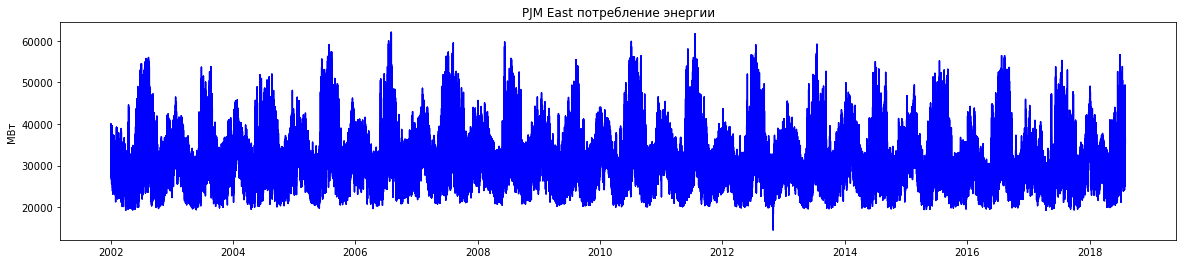

In [4]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [5]:
data_d = data.copy().resample('W').mean()
data_d.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [6]:
data_d.drop('dayofweek', axis=1,inplace=True)


In [7]:
data_d.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,11.50000,0.000000,0.000000,0.000000


In [8]:
data_d.drop('hour', axis=1,inplace=True)
data_d.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,0.000000,0.000000,0.000000


In [9]:
data_d.drop('year', axis=1,inplace=True)

In [11]:
data_d.iloc[:,:].head()

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,0.000000,0.000000,0.000000


In [12]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE 
import seaborn as sns

scl=StandardScaler()
tsne_ =TSNE(n_components=2)

X = data_d.iloc[:,:].values

Xscale = scl.fit_transform(X)
X_t = tsne_.fit_transform(Xscale)



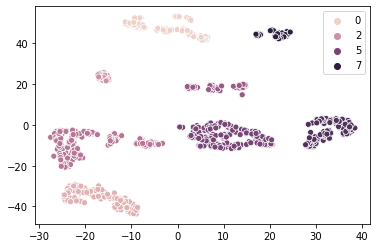

In [14]:
clast_0 = DBSCAN(eps=5, leaf_size=15 )
clast_1 = DBSCAN(eps=2, leaf_size=5)
X_clast =clast_0.fit_predict(X_t)
X_scale_clast =clast_1.fit_predict(Xscale)

sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_clast)
plt.show()

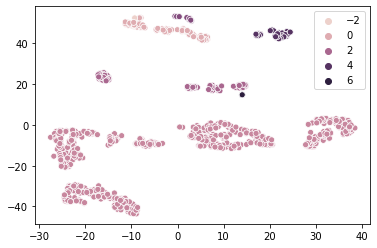

In [15]:
sns.scatterplot(X_t[:,0],X_t[:,1], hue=X_scale_clast )
plt.show()

Рис.3. Результат кластер-анализа признаков

In [16]:
print('Число кластеров в календаре с масштабированием: ',len(np.unique(X_scale_clast)))
print('Число кластеров в календаре: ',len(np.unique(X_clast)))

Число кластеров в календаре с масштабированием:  7
Число кластеров в календаре:  8


In [17]:
data_d['day_week_month'] = X_clast


,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month
Date,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.000000,3.517483,1.0,0.160839,0.000000,0.167832,0
2002-01-27,30141.529762,1.000000,24.000000,1.000000,24.000000,4.0,0.142857,0.000000,0.142857,0
2002-02-24,29144.130952,2.000000,21.000000,1.000000,52.000000,8.0,0.142857,0.000000,0.142857,0
2002-06-02,31448.660714,5.285714,21.142857,2.000000,150.000000,22.0,0.142857,0.000000,0.142857,0
2002-07-07,38626.654762,7.000000,4.000000,3.000000,185.000000,27.0,0.142857,0.142857,0.142857,0
2002-09-08,31535.172619,9.000000,5.000000,3.000000,248.000000,36.0,0.142857,0.000000,0.142857,0
2002-10-20,27504.827381,10.000000,17.000000,4.000000,290.000000,42.0,0.142857,0.000000,0.142857,0
2002-11-17,28881.886905,11.000000,14.000000,4.000000,318.000000,46.0,0.142857,0.000000,0.142857,0
2003-01-05,31034.410714,4.142857,10.857143,1.857143,106.285714,1.0,0.142857,0.142857,0.142857,0


In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='full')
Xpca=pca.fit_transform(Xscale[:,1:])
Xpca.shape

(866, 2)

In [21]:
data_d['pca1']=Xpca[:,0]
data_d['pca2']=Xpca[:,1]

In [23]:
first_diff =np.array(data_d.iloc[1:,0].values - data_d.iloc[:-1,0].values).astype('float32') 
data_d['diff1'] = 0.0
data_d['diff1'] =  data_d['diff1'].astype('float') 
data_d['diff1'].values[1:] = first_diff

In [24]:
first_diff_d =(first_diff) / data_d.iloc[1:,0].values
data_d['diff1_d'] = 0.0
data_d['diff1_d'] =  data_d['diff1_d'].astype('float') 
data_d['diff1_d'].values[1:] = np.array(first_diff_d).astype('float32')

In [25]:
first_diff_l =np.log(data_d.iloc[1:,0].values) 
#first_diff_l, lmbda1 = scs.boxcox(data_d.iloc[1:,0].values) # НЕ РАБОТАЕТ , Т.К. АРГУМЕНТ ЛОГАРИФМА БЛИЗОК 0 
data_d['diff1_l'] = 0
data_d['diff1_l'] =  data_d['diff1_l'].astype('float') 
data_d['diff1_l'].values[1:] = first_diff_l

In [27]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_d['exp_0_05'] = exponential_smoothing(data_d['PJME_MW'], 0.05)


In [28]:
data_d.iloc[10:15,:]


,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,pca1,pca2,diff1,diff1_d,diff1_l,exp_0_05
Date,,,,,,,,,,,,,,,,
2002-03-17,28672.779762,3.0,14.000000,1.0,73.000000,11.0,0.0,0.0,0.0,1,-2.337303,-0.380939,-768.130981,-0.026790,10.263704,31436.852496
2002-03-24,29927.488095,3.0,21.000000,1.0,80.000000,12.0,0.0,0.0,0.0,1,-2.235254,-0.376941,1254.708374,0.041925,10.306533,31361.384276
2002-03-31,27595.869048,3.0,28.000000,1.0,87.000000,13.0,0.0,0.0,0.0,1,-2.133205,-0.372943,-2331.619141,-0.084492,10.225421,31173.108514
2002-04-07,28308.778443,4.0,3.982036,2.0,93.982036,14.0,0.0,0.0,0.0,3,-1.601967,-0.547147,712.909424,0.025183,10.250927,31029.892011
2002-04-14,27182.482143,4.0,11.000000,2.0,101.000000,15.0,0.0,0.0,0.0,3,-1.499740,-0.543122,-1126.296265,-0.041435,10.210328,30837.521517


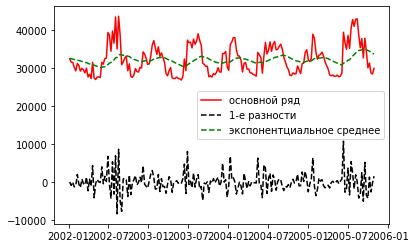

In [29]:
N100=200
plt.plot(data_d.index[:N100],data_d['PJME_MW'][:N100],'r',label ='основной ряд')
plt.plot(data_d.index[:N100],data_d['diff1'][:N100],'--k',label ='1-е разности')
plt.plot(data_d.index[:N100],data_d['exp_0_05'][:N100],'--g',label ='экспонентциальное среднее')
plt.legend()
plt.show()


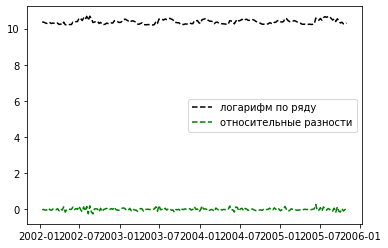

In [30]:
N100=200
plt.plot(data_d.index[1:N100],data_d['diff1_l'][1:N100],'--k',label ='логарифм по ряду')

plt.plot(data_d.index[1:N100],data_d['diff1_d'][1:N100],'--g',label ='относительные разности')
plt.legend()
plt.show()

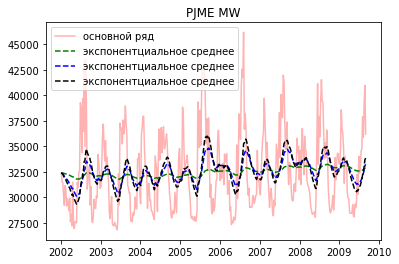

In [31]:
data_d['exp_0_01'] = exponential_smoothing(data_d['PJME_MW'], 0.01)
data_d['exp_0_03'] = exponential_smoothing(data_d['PJME_MW'], 0.03)
data_d['exp_0_04'] = exponential_smoothing(data_d['PJME_MW'], 0.04)
data_d['exp_0_06'] = exponential_smoothing(data_d['PJME_MW'], 0.06)
data_d['exp_0_07'] = exponential_smoothing(data_d['PJME_MW'], 0.07)
data_d['exp_0_08'] = exponential_smoothing(data_d['PJME_MW'], 0.08)

N100=400
plt.plot(data_d.index[:N100],data_d['PJME_MW'][:N100],'r',label ='основной ряд',alpha=0.3)
plt.plot(data_d.index[:N100],data_d['exp_0_01'][:N100],'--g',label ='экспонентциальное среднее')
plt.plot(data_d.index[:N100],data_d['exp_0_05'][:N100],'--b',label ='экспонентциальное среднее')
plt.plot(data_d.index[:N100],data_d['exp_0_08'][:N100],'--k',label ='экспонентциальное среднее')
plt.legend()
plt.title('PJME MW')
plt.show()

In [33]:
data_d.iloc[:7,14]=0

In [34]:
data_d.head()

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,...,diff1,diff1_d,diff1_l,exp_0_05,exp_0_01,exp_0_03,exp_0_04,exp_0_06,exp_0_07,exp_0_08
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,0.160839,0.000000,0.167832,0,...,0.000000,0.000000,0.0,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839,32392.160839
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,0.000000,0.000000,0.000000,1,...,-904.773926,-0.028734,0.0,32346.922142,32383.113100,32365.017621,32355.969882,32337.874403,32328.826664,32319.778924
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,0.000000,0.142857,0.000000,2,...,-34.505951,-0.001097,0.0,32302.220083,32373.810778,32337.653521,32319.846325,32284.774796,32267.510464,32250.427087
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,0.142857,0.000000,0.142857,0,...,-1311.351196,-0.043506,0.0,32194.185567,32351.487968,32271.769808,32232.713662,32156.180094,32118.691815,32081.715301
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,0.000000,0.000000,0.000000,1,...,-945.041687,-0.032368,0.0,32044.300693,32319.937969,32179.511357,32111.264639,31978.598574,31914.137554,31850.897124


In [35]:
p = 14
for i in range(p):
    data_d['t'+str(p-i)]=0
    data_d['t'+str(p-i)].values[p:] = data_d['PJME_MW'].values[i:-(p)+i]

In [36]:
p = 14
for i in range(p):
    data_d['d'+str(p-i)]=0
    data_d['d'+str(p-i)].values[p:] = data_d['diff1'].values[i:-(p)+i]

Итоговая система признаков

In [37]:
data_d.head(20)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,0.160839,0.000000,0.167832,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,0.000000,0.142857,0.000000,2,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,0.142857,0.000000,0.142857,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2.000000,7.000000,1.0,38.000000,6.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2.000000,14.000000,1.0,45.000000,7.0,0.000000,0.142857,0.000000,2,...,0,0,0,0,0,0,0,0,0,0
2002-02-24,29144.130952,2.000000,21.000000,1.0,52.000000,8.0,0.142857,0.000000,0.142857,0,...,0,0,0,0,0,0,0,0,0,0
2002-03-03,29869.011905,2.428571,16.000000,1.0,59.000000,9.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0


## Выделение существенных признаков

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 

In [39]:
scl_target=StandardScaler() 
# p = 14
h=4
target = data_d['PJME_MW'].values[h+p:].reshape((data_d.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(848, 1)

In [40]:
scl_x=StandardScaler() 

X = data_d.iloc[p:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(848, 50)

In [191]:
X[:7,14]=0

In [46]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))


F-test=0.52,  I=0
F-test=0.01,  I=1
F-test=0.00,  I=2
F-test=0.01,  I=3
F-test=0.01,  I=4
F-test=0.01,  I=5
F-test=0.04,  I=6
F-test=0.03,  I=7
F-test=0.04,  I=8
F-test=0.01,  I=9
F-test=0.02,  I=10
F-test=0.04,  I=11
F-test=0.10,  I=12
F-test=0.10,  I=13
F-test=0.53,  I=14
F-test=0.07,  I=15
F-test=0.00,  I=16
F-test=0.05,  I=17
F-test=0.07,  I=18
F-test=0.08,  I=19
F-test=0.07,  I=20
F-test=0.06,  I=21
F-test=0.12,  I=22
F-test=0.28,  I=23
F-test=0.49,  I=24
F-test=0.72,  I=25
F-test=0.93,  I=26
F-test=1.00,  I=27
F-test=0.94,  I=28
F-test=0.66,  I=29
F-test=0.43,  I=30
F-test=0.20,  I=31
F-test=0.05,  I=32
F-test=0.00,  I=33
F-test=0.05,  I=34
F-test=0.22,  I=35
F-test=0.08,  I=36
F-test=0.07,  I=37
F-test=0.04,  I=38
F-test=0.02,  I=39
F-test=0.01,  I=40
F-test=0.00,  I=41
F-test=0.00,  I=42
F-test=0.02,  I=43
F-test=0.03,  I=44
F-test=0.07,  I=45
F-test=0.11,  I=46
F-test=0.12,  I=47
F-test=0.14,  I=48
F-test=0.12,  I=49


In [47]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(848, 5)

In [48]:
column_names = data_d.columns[sfk.get_support()]
column_names

Index(['t11', 't10', 't9', 't8', 't7'], dtype='object')

In [49]:
X_new1[295:300,:]

array([[-0.21003956,  0.33077447,  0.29190523, -0.11308818, -0.52149582],
       [ 0.32989395,  0.29167236, -0.11454899, -0.52261247, -0.60505457],
       [ 0.2907356 , -0.11488935, -0.52451145, -0.60621951, -0.6005514 ],
       [-0.11641093, -0.52496023, -0.60820794, -0.60171374, -0.20527347],
       [-0.52707166, -0.60867886, -0.60369735, -0.20620739, -0.18575974]])

In [51]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(848, 5)

In [52]:
column_namesp = data_d.columns[sfp.get_support()]
column_namesp

Index(['t11', 't10', 't9', 't8', 't7'], dtype='object')

In [53]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(848, 5)

Сравним результаты:


In [54]:
[X_new1[10:15,:], X_new2[10:15,:],X_new3[10:15,:]]

[array([[-0.94701995, -1.22654237, -0.14787724, -1.18971653, -1.2850327 ],
        [-1.22966297, -0.14822641, -1.19232926, -1.28659056, -1.12041695],
        [-0.14979594, -1.19295466, -1.28930694, -1.12187969, -1.1156636 ],
        [-1.19602695, -1.28995798, -1.12441984, -1.1171236 , -1.14718577],
        [-1.2931698 , -1.12502727, -1.11965866, -1.14866398, -0.15448776]]),
 array([[-0.94701995, -1.22654237, -0.14787724, -1.18971653, -1.2850327 ],
        [-1.22966297, -0.14822641, -1.19232926, -1.28659056, -1.12041695],
        [-0.14979594, -1.19295466, -1.28930694, -1.12187969, -1.1156636 ],
        [-1.19602695, -1.28995798, -1.12441984, -1.1171236 , -1.14718577],
        [-1.2931698 , -1.12502727, -1.11965866, -1.14866398, -0.15448776]]),
 array([[-0.11197948,  0.17625233, -1.22654237, -0.14787724, -1.18971653],
        [-0.04388183,  1.71725223, -0.14822641, -1.19232926, -1.28659056],
        [ 0.02421582,  1.58406652, -1.19295466, -1.28930694, -1.12187969],
        [ 0.09231347,

In [55]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [25 26 27 28 29]
Номера признаков лучших признаков по процентной форме:  [25 26 27 28 29]
Номера признаков для выбора по модели :  [ 4 14 26 27 28]


In [57]:
list_par=[4,14,24,34,35,25,27,28]
X_new = X[:,list_par]
data_d.columns[list_par]

Index(['dayofyear', 'diff1_l', 't12', 't2', 't1', 't11', 't9', 't8'], dtype='object')

In [58]:
from sklearn.linear_model import LinearRegression 


## Разделение данных на тестовые и тренировочные 

Построение модели начинаем с выделения тестовой части нашего ряда. Напомним, что для временных рядов тест - непрерывная часть ряда не входившая в обучение (временные ряды 1). Будем отделять по индексу, который задаст дату разделения модели на тест и обучение.

In [59]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

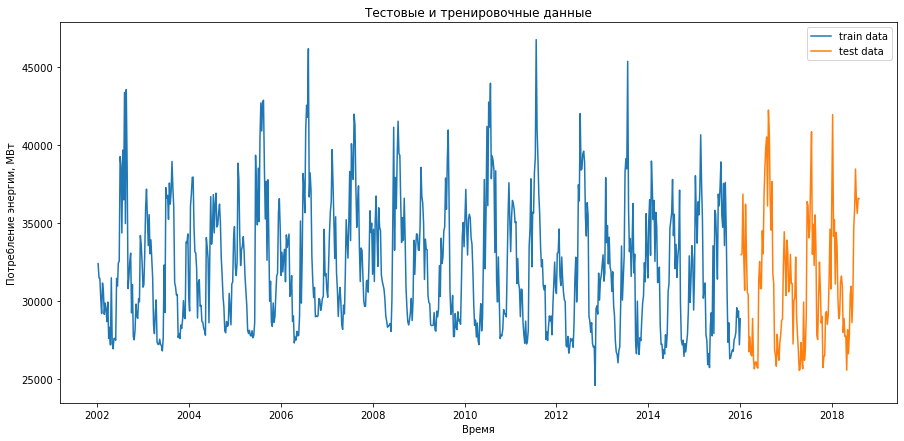

In [60]:
train, test = split_data( data_d, '01-06-2016')

plt.figure( figsize=( 15, 7 ))
plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(train.index.get_level_values('Date'),train['PJME_MW'], label='train data' )
plt.plot(test.index.get_level_values('Date'),test['PJME_MW'], label='test data')
plt.title( 'Тестовые и тренировочные данные' )
plt.legend()
plt.show()

In [61]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

# Строим Модель

При решении задачи на начальном этапе, самый интересный результат был получен на модели GradientBoostingRegressor. Остановимся на построении иенно такой формы предсказания. Импортируем необходимые модели.

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

Запускаем модели и смотрим , что они построят на наших примерах.

In [66]:
model_g.fit( X_train, y_train ) # 

GradientBoostingRegressor(max_depth=5, random_state=0)

**Посмотрим тесты**

In [67]:
X_test.shape

(117, 8)

In [68]:
y_test_pred_g = model_g.predict(X_test)

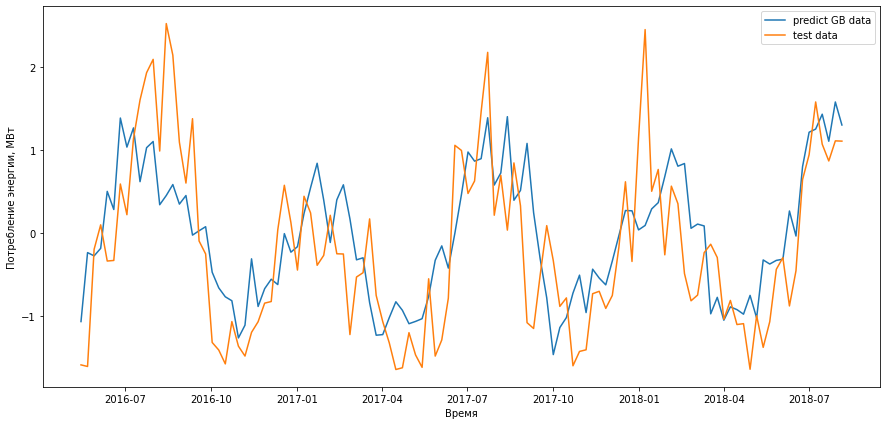

In [69]:

plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[h+p:],y_test_pred_g, label='predict GB data' )
plt.plot(test.index[h+p:],y_test, label='test data')

plt.legend()
plt.show()

**Оценки для сравнения моделей**

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [71]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.5658668586906707 
ошибка mae  :   0.5949386901569328 
оценка R2 :   0.4639857538217035


Абсолютная процентная ошибка (MAPE).Обратите внимание, что определять ее для масштабированной переменной не верно. Пожэтому переведем ответ решателя обратно в состояние без масштаба.

In [72]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [73]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.62919309340462 %


Анализ на отсутствие корреляции с последующим ответом (проверяем не делаем ли предсказание в стиле "завтра==сегодня")

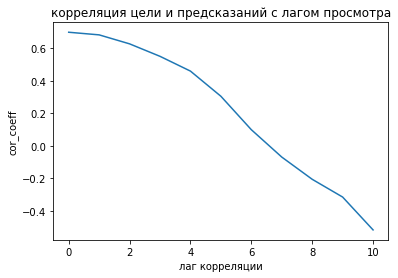

In [74]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция цели и предсказаний с лагом просмотра')
plt.show()

In [75]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,10,14,5], 
              "n_estimators":[100,200,300,400,500, 1000, 1200,1500]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

C:\Users\erbya\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


Model with rank: 1
Mean validation score: 0.541 (std: 0.170)
Parameters: {'n_estimators': 400, 'max_depth': 3}

Model with rank: 2
Mean validation score: 0.538 (std: 0.166)
Parameters: {'n_estimators': 100, 'max_depth': 5}

Model with rank: 3
Mean validation score: 0.525 (std: 0.170)
Parameters: {'n_estimators': 200, 'max_depth': 5}



Выбираем модель с рангом 1. {'n_estimators': 400, 'max_depth': 3} 

In [76]:
model_g_best = GradientBoostingRegressor(max_depth=3,  n_estimators=400)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   7.458545605323169 %


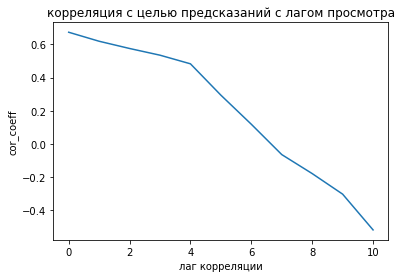

In [77]:
lag=10
p_cor=[np.corrcoef( y_test, y_test_pred_g)[1,0]]
for i in range(lag):
    c=np.corrcoef( y_test[:-(i+1)], y_test_pred_g[(i+1):])[1,0]
    p_cor.append(c)    

plt.plot(np.array(p_cor) )  
plt.xlabel('лаг корреляции')
plt.ylabel('cor_coeff')
plt.title('корреляция с целью предсказаний с лагом просмотра')
plt.show()

## Использование модели для предсказания n*h моментов времени

Мы построили короткий прогноз, но его можно продолжить на следующие точки ряда. Для этого будем использовать результаты прогноза для следующего шага.  Необходимо заменять X_test[t+i, 0] = y_test[t+i-1] и продолжить моделирование в новом состоянии. Сделаем 4 точки прогноза.

In [224]:
X_test_100 = X_test.copy()

In [79]:
data_d.head(7)

,PJME_MW,month,dayofmonth,quarter,dayofyear,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,day_week_month,...,d10,d9,d8,d7,d6,d5,d4,d3,d2,d1
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,3.517483,1.0,3.517483,1.0,0.160839,0.000000,0.167832,0,...,0,0,0,0,0,0,0,0,0,0
2002-01-13,31487.386905,1.000000,10.000000,1.0,10.000000,2.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
2002-01-20,31452.880952,1.000000,17.000000,1.0,17.000000,3.0,0.000000,0.142857,0.000000,2,...,0,0,0,0,0,0,0,0,0,0
2002-01-27,30141.529762,1.000000,24.000000,1.0,24.000000,4.0,0.142857,0.000000,0.142857,0,...,0,0,0,0,0,0,0,0,0,0
2002-02-03,29196.488095,1.428571,17.714286,1.0,31.000000,5.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
2002-02-10,31150.517857,2.000000,7.000000,1.0,38.000000,6.0,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
2002-02-17,30616.565476,2.000000,14.000000,1.0,45.000000,7.0,0.000000,0.142857,0.000000,2,...,0,0,0,0,0,0,0,0,0,0


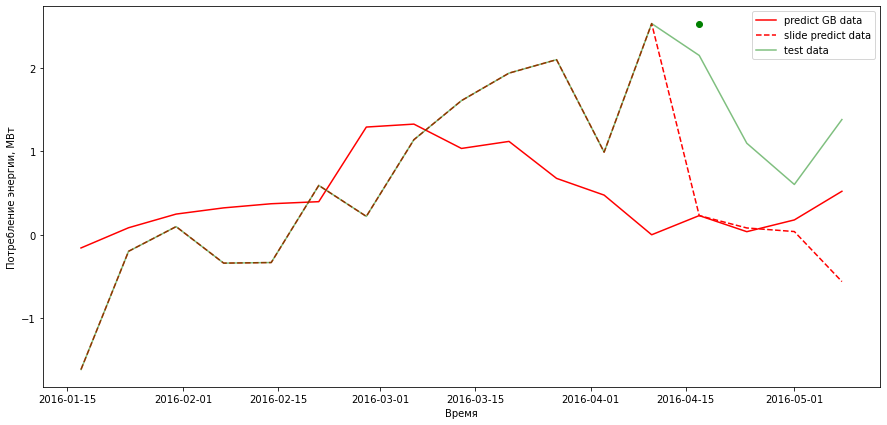

In [83]:

# ['dayofyear', 'diff1_l', 't12', 't2', 't1', 't11', 't9', 't8'], dtype='object'
X_test_100 = X_test.copy()
y_test_100 = y_test.copy()
N10 = 4
for i in range(p,N10+p):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )
                                     
    
    dy=X_test_100[i,0]
    X_test_100[i+1,0] = dy+7 if dy<358 else dy-358
    xy_i=(np.log((y_i))-scl_x.mean_[15])*scl_x.scale_[15]
    
    X_test_100[i+1,1] = xy_i 
    # обновим историю значенний
    
    X_test_100[i+1,2] = X_test_100[i-12,0]
    X_test_100[i+1,3] = X_test_100[i-2,0]
    
    X_test_100[i+1,4] = X_test_100[i-1,0]
    X_test_100[i+1,5] = X_test_100[i-11,0]
    X_test_100[i+1,6] = X_test_100[i-9,0]
    X_test_100[i+1,7] = X_test_100[i-8,0]
        
    
    
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[1:N10+p],y_test_pred_g[1:N10+p], 'r',label='predict GB data' )
plt.plot(test.index[1:N10+p],y_test_100[1:N10+p], '--r',label='slide predict data')
plt.plot(test.index[1:N10+p],y_test[1:N10+p], 'g',label='test data', alpha=0.5)
plt.plot(test.index[p],y_test[p-1], 'og', alpha=1)
plt.legend()
plt.show()    

In [84]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:p+N10]),y_pred = scl_target.inverse_transform( y_test_100[p:p+N10]))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   14.253661811106824 %


Ошибка прогноза при построении модели на 4 недели вперед выросла почти в 2 раза при рекурсивном построении предсказаний. Это не удивительно, само по себе предстаказние на 4 недели вперед не точное и ошибка при использовании неточных данных возрастает тем сильнее, чем больше мы используем неточных данных, полученных в результате такой модели.

In [93]:
X_test_100 = X_test.copy()
y_test_100 = y_test.copy()
#N10 = 4
er_list=[]
mean_er=[]

for i in range(p,101+p):
    y_test_100[i] = model_g_best.predict(X_test_100[i,:].reshape((1,X_test_100.shape[1])))
    # восстанавливаем не масштабированное значение ряда текущей точке  
    y_i=scl_target.inverse_transform(y_test_100[i:i+1]  )    


    dy=X_test_100[i,0]
    X_test_100[i+1,0] = dy+7 if dy<358 else dy-358
    xy_i=(np.log((y_i))-scl_x.mean_[15])*scl_x.scale_[15]

    X_test_100[i+1,1] = xy_i 
    # обновим историю значенний

    X_test_100[i+1,2] = X_test_100[i-12,0]
    X_test_100[i+1,3] = X_test_100[i-2,0]

    X_test_100[i+1,4] = X_test_100[i-1,0]
    X_test_100[i+1,5] = X_test_100[i-11,0]
    X_test_100[i+1,6] = X_test_100[i-9,0]
    X_test_100[i+1,7] = X_test_100[i-8,0]
    er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test[p:p+i]),y_pred = scl_target.inverse_transform( y_test_100[p:p+i]))
    er_list.append(er_g)
    if i%10==0:
        mean_er.append(np.mean(er_list))
        er_list=[]
                   
        #print('ошибка градиентного бустинга MAPE при прогнозе на :  ', N10, er_g,'%')
print(mean_er) 

[2.974032893966087, 4.274430087443308, 4.778107762033381, 5.03906895241356, 6.563579608742854, 7.515145212731772, 7.645693190895277, 7.832119043763056, 7.797994666839652, 8.08121866821235]


С увеличением горизонта построения слайдера растет и ошибка модели.